In [ ]:
import pandas as pd
import csv
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv("preprocessed_dataset.csv", low_memory=False)
df

,State,StateAbbrev,StateFips,SchYear,DataLevel,DistName,SchName,NCESDistrictID,StateAssignedDistID,NCESSchoolID,...,Total Dropouts Grades 9-12,Total Revenue (TOTALREV) per Pupil (V33),Total Students All Grades (Excludes AE),Two or More Races - female,Two or More Races - male,White - female,White - male,Per Pupil Expenditure,Year_clean,Grade_numeric
0,Indiana,IN,18,2022-23,District,21St Century Charter Sch of Gary,All Schools,1800046.0,9545.0,NaN,...,‡,12330.0,1337,18,11,1,1,12313.7,2023.0,3.0
1,Indiana,IN,18,2022-23,District,21St Century Charter Sch of Gary,All Schools,1800046.0,9545.0,NaN,...,‡,12330.0,1337,18,11,1,1,12313.7,2023.0,4.0
2,Indiana,IN,18,2022-23,District,21St Century Charter Sch of Gary,All Schools,1800046.0,9545.0,NaN,...,‡,12330.0,1337,18,11,1,1,12313.7,2023.0,5.0
3,Indiana,IN,18,2022-23,District,21St Century Charter Sch of Gary,All Schools,1800046.0,9545.0,NaN,...,‡,12330.0,1337,18,11,1,1,12313.7,2023.0,6.0
4,Indiana,IN,18,2022-23,District,21St Century Charter Sch of Gary,All Schools,1800046.0,9545.0,NaN,...,‡,12330.0,1337,18,11,1,1,12313.7,2023.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99525,Hawaii,HI,15,2014-15,District,Hawaii Department of Education,All Schools,1500030.0,HI-001,NaN,...,NaN,14824.0,182384,9604,10593,11493,12811,17011.7,2015.0,4.0
99526,Hawaii,HI,15,2014-15,District,Hawaii Department of Education,All Schools,1500030.0,HI-001,NaN,...,NaN,14824.0,182384,9604,10593,11493,12811,17011.7,2015.0,5.0
99527,Hawaii,HI,15,2014-15,District,Hawaii Department of Education,All Schools,1500030.0,HI-001,NaN,...,NaN,14824.0,182384,9604,10593,11493,12811,17011.7,2015.0,6.0
99528,Hawaii,HI,15,2014-15,District,Hawaii Department of Education,All Schools,1500030.0,HI-001,NaN,...,NaN,14824.0,182384,9604,10593,11493,12811,17011.7,2015.0,7.0


In [2]:
# Counting how many missing per column
missing_counts = df.isna().sum()
print("Columns with missing values:\n", missing_counts[missing_counts > 0])

# Geting only the rows that have at least one missing entry
missing_rows = df[df.isna().any(axis=1)]

print("\nExample rows with missing data:")
print(missing_rows.head())

Columns with missing values:
 NCESSchoolID                                                  94369
StateAssignedSchID                                            99530
StudentSubGroup_TotalTested                                   18343
Lev1_count                                                    24157
Lev1_percent                                                  16702
Lev2_count                                                    43074
Lev2_percent                                                  35618
Lev3_count                                                    45314
Lev3_percent                                                  39172
Lev4_count                                                    45320
Lev4_percent                                                  39178
Lev5_count                                                    91643
Lev5_percent                                                  91643
AvgScaleScore                                                 91643
ProficientOrAbove_


=== MATH MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     80.19
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:25   Log-Likelihood:                -14180.
No. Observations:                3939   AIC:                         2.853e+04
Df Residuals:                    3853   BIC:                         2.907e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

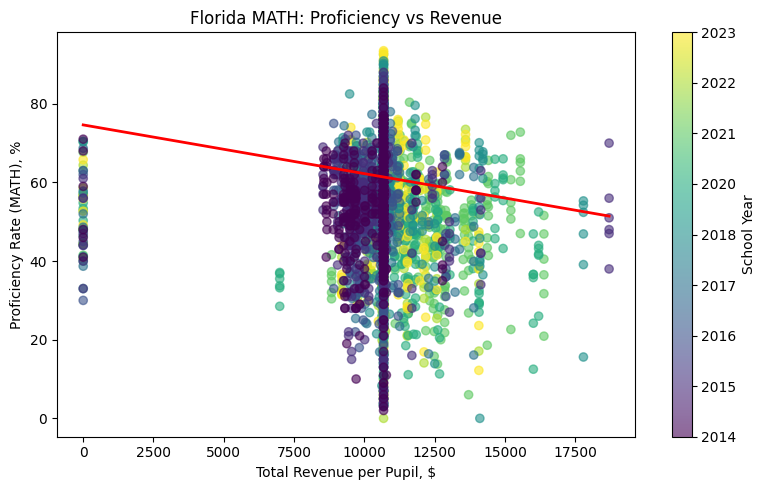


=== ELA MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:25   Log-Likelihood:                -12163.
No. Observations:                3949   AIC:                         2.450e+04
Df Residuals:                    3863   BIC:                         2.504e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

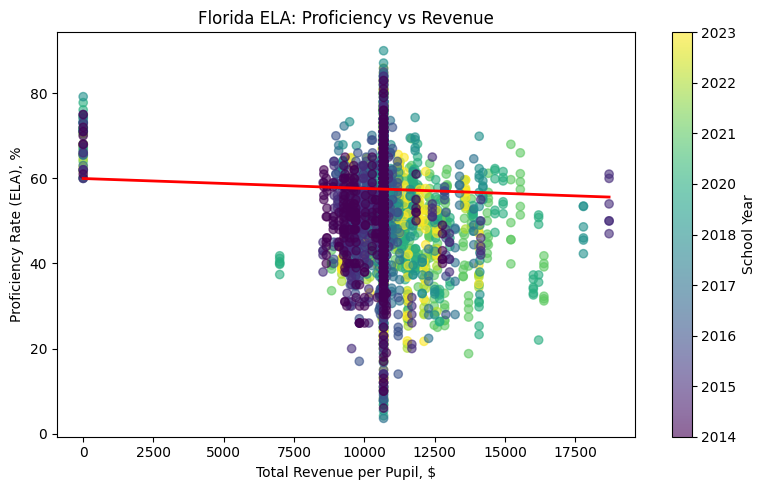

In [3]:
path = "preprocessed_dataset.csv"
filtered = []

with open(path, newline="") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    # original indices
    idx_state = header.index("State")
    idx_subj = header.index("Subject")
    idx_rev = header.index("Total Revenue (TOTALREV) per Pupil (V33)")
    idx_prof = header.index("ProficientOrAbove_percent")
    idx_year = header.index("SchYear_clean")

    # new indices
    idx_part = header.index("ParticipationRate")
    idx_disloc = header.index("DistLocale")
    idx_district = header.index("DistrictName_clean")
    idx_ptratio = header.index("Pupil/Teacher Ratio")
    idx_grade = header.index("Grade_numeric")

    # collecting both math and ela
    for row in reader:
        subj = row[idx_subj].strip().lower()
        if row[idx_state] == "Florida" and subj in ("math", "ela"):
            try:
                prof = float(row[idx_prof])
                rev = float(row[idx_rev])
                part = float(row[idx_part])
                ptratio = float(row[idx_ptratio])
                grade = int(float(row[idx_grade]))
            except ValueError:
                continue

            filtered.append(
                {
                    "Subject": subj,
                    "Proficient": prof,
                    "TotalRevenue": rev,
                    "SchYear_clean": row[idx_year],
                    "ParticipationRate": part,
                    "DistLocale": row[idx_disloc],
                    "DistrictName_clean": row[idx_district],
                    "Pupil/Teacher Ratio": ptratio,
                    "Grade_numeric": grade,
                }
            )

# building DataFrame
df = pd.DataFrame(filtered)
df["SchYear_clean"] = df["SchYear_clean"].astype("category")
df["DistLocale"] = df["DistLocale"].astype("category")
df["DistrictName_clean"] = df["DistrictName_clean"].astype("category")

# runing model + ploting for each subject in one script
for subj in ("math", "ela"):
    df_sub = df[df["Subject"] == subj]

    # fiting OLS
    print(f"\n=== {subj.upper()} MODEL ===")
    model = smf.ols(
        "Proficient ~ TotalRevenue + ParticipationRate + Grade_numeric "
        "+ C(DistLocale) + C(DistrictName_clean)",
        data=df_sub,
    ).fit()
    print(model.summary())

    # scattering + regression line
    x_line = np.linspace(
        df_sub["TotalRevenue"].min(), df_sub["TotalRevenue"].max(), 100
    )
    y_line = model.params["Intercept"] + model.params["TotalRevenue"] * x_line

    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(
        df_sub["TotalRevenue"],
        df_sub["Proficient"],
        c=df_sub["SchYear_clean"].cat.codes,
        alpha=0.6,
    )
    cbar = plt.colorbar(scatter, ticks=np.unique(df_sub["SchYear_clean"].cat.codes))
    cbar.ax.set_yticklabels(df_sub["SchYear_clean"].cat.categories)
    cbar.set_label("School Year")

    plt.plot(x_line, y_line, color="red", linewidth=2)
    plt.xlabel("Total Revenue per Pupil, $")
    plt.ylabel(f"Proficiency Rate ({subj.upper()}), %")
    plt.title(f"Florida {subj.upper()}: Proficiency vs Revenue")
    plt.tight_layout()
    plt.show()

## Below are the same code and results, but different charts (i would prefer these ones for better interpretations)



=== MATH MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     80.19
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:26   Log-Likelihood:                -14180.
No. Observations:                3939   AIC:                         2.853e+04
Df Residuals:                    3853   BIC:                         2.907e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

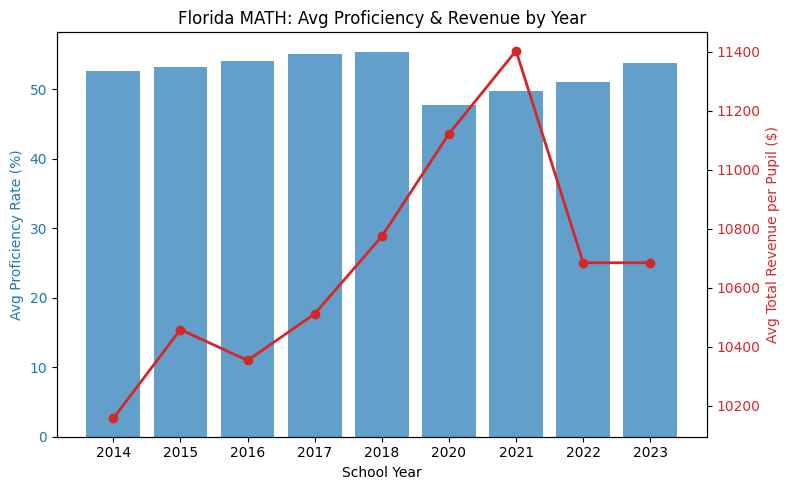



=== ELA MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:26   Log-Likelihood:                -12163.
No. Observations:                3949   AIC:                         2.450e+04
Df Residuals:                    3863   BIC:                         2.504e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

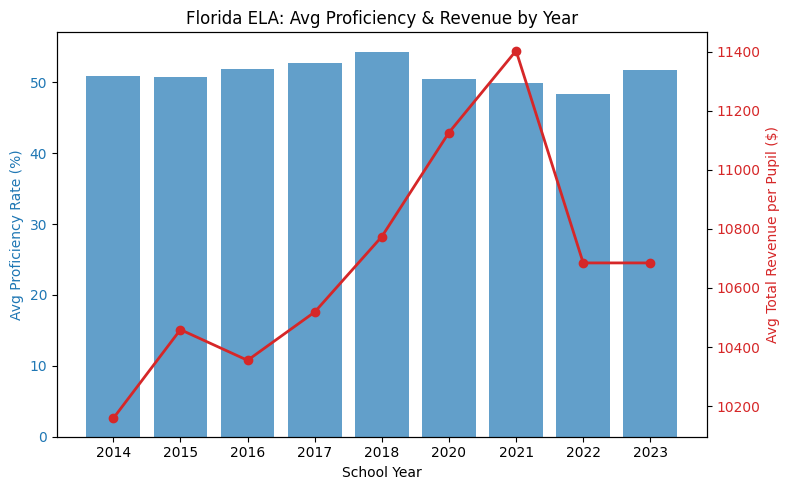

In [4]:
path = "preprocessed_dataset.csv"
filtered = []

with open(path, newline="") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    # original indices
    idx_state = header.index("State")
    idx_subj = header.index("Subject")
    idx_rev = header.index("Total Revenue (TOTALREV) per Pupil (V33)")
    idx_prof = header.index("ProficientOrAbove_percent")
    idx_year = header.index("SchYear_clean")

    # new indices
    idx_part = header.index("ParticipationRate")
    idx_disloc = header.index("DistLocale")
    idx_district = header.index("DistrictName_clean")
    idx_ptratio = header.index("Pupil/Teacher Ratio")
    idx_grade = header.index("Grade_numeric")

    for row in reader:
        subj = row[idx_subj].strip().lower()
        if row[idx_state] == "Florida" and subj in ("math", "ela"):
            try:
                prof = float(row[idx_prof])
                rev = float(row[idx_rev])
                part = float(row[idx_part])
                ptratio = float(row[idx_ptratio])
                grade = int(float(row[idx_grade]))
            except ValueError:
                continue

            filtered.append(
                {
                    "Subject": subj,
                    "Proficient": prof,
                    "TotalRevenue": rev,
                    "SchYear_clean": row[idx_year],
                    "ParticipationRate": part,
                    "DistLocale": row[idx_disloc],
                    "DistrictName_clean": row[idx_district],
                    "Pupil/Teacher Ratio": ptratio,
                    "Grade_numeric": grade,
                }
            )

# building DataFrame and convert to categorical
df = pd.DataFrame(filtered)
df["SchYear_clean"] = df["SchYear_clean"].astype("category")
df["DistLocale"] = df["DistLocale"].astype("category")
df["DistrictName_clean"] = df["DistrictName_clean"].astype("category")

# looping over subjects
for subj in ("math", "ela"):
    df_sub = df[df["Subject"] == subj]

    # fiting and print OLS
    print(f"\n\n=== {subj.upper()} MODEL ===")
    model = smf.ols(
        "Proficient ~ TotalRevenue + ParticipationRate + Grade_numeric "
        "+ C(DistLocale) + C(DistrictName_clean)",
        data=df_sub,
    ).fit()
    print(model.summary())

    # aggregating by school year
    yearly = (
        df_sub.groupby("SchYear_clean", sort=True)
        .agg(AvgProficient=("Proficient", "mean"), AvgRevenue=("TotalRevenue", "mean"))
        .reset_index()
    )

    # ploting: bar = avg proficiency, line = avg revenue
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(yearly["SchYear_clean"].astype(str), yearly["AvgProficient"], alpha=0.7)
    ax1.set_xlabel("School Year")
    ax1.set_ylabel("Avg Proficiency Rate (%)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    ax2.plot(
        yearly["SchYear_clean"].astype(str),
        yearly["AvgRevenue"],
        color="tab:red",
        marker="o",
        linewidth=2,
    )
    ax2.set_ylabel("Avg Total Revenue per Pupil ($)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    plt.title(f"Florida {subj.upper()}: Avg Proficiency & Revenue by Year")
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()



=== MATH MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     100.1
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:28   Log-Likelihood:                -89608.
No. Observations:               23632   AIC:                         1.805e+05
Df Residuals:                   23012   BIC:                         1.855e+05
Df Model:                         619                                         
Covariance Type:            nonrobust                                         
                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------

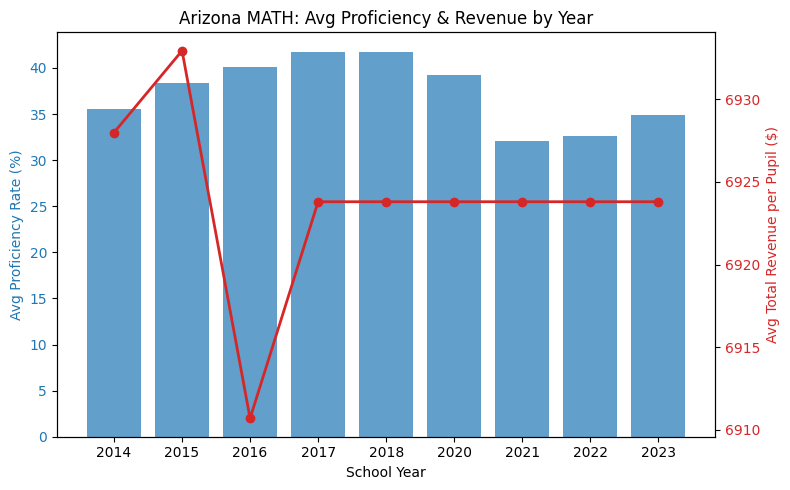



=== ELA MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     146.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:30   Log-Likelihood:                -85257.
No. Observations:               23643   AIC:                         1.718e+05
Df Residuals:                   23024   BIC:                         1.767e+05
Df Model:                         618                                         
Covariance Type:            nonrobust                                         
                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

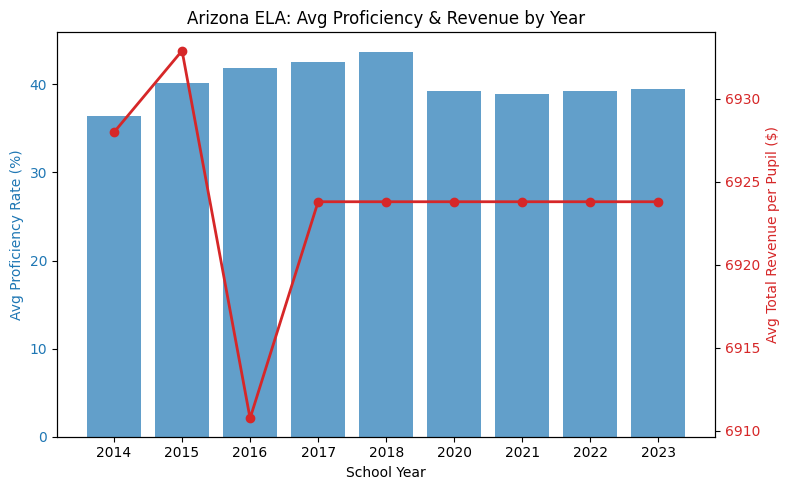

In [ ]:
path = "preprocessed_dataset.csv"
filtered = []

with open(path, newline="") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    idx_state = header.index("State")
    idx_subj = header.index("Subject")
    idx_rev = header.index("Total Revenue (TOTALREV) per Pupil (V33)")
    idx_prof = header.index("ProficientOrAbove_percent")
    idx_year = header.index("SchYear_clean")

    idx_part = header.index("ParticipationRate")
    idx_disloc = header.index("DistLocale")
    idx_district = header.index("DistrictName_clean")
    idx_ptratio = header.index("Pupil/Teacher Ratio")
    idx_grade = header.index("Grade_numeric")

    for row in reader:
        subj = row[idx_subj].strip().lower()
        if row[idx_state] == "Arizona" and subj in ("math", "ela"):
            try:
                prof = float(row[idx_prof])
                rev = float(row[idx_rev])
                part = float(row[idx_part])
                ptratio = float(row[idx_ptratio])
                grade = int(float(row[idx_grade]))
            except ValueError:
                continue

            filtered.append(
                {
                    "Subject": subj,
                    "Proficient": prof,
                    "TotalRevenue": rev,
                    "SchYear_clean": row[idx_year],
                    "ParticipationRate": part,
                    "DistLocale": row[idx_disloc],
                    "DistrictName_clean": row[idx_district],
                    "Pupil/Teacher Ratio": ptratio,
                    "Grade_numeric": grade,
                }
            )


df = pd.DataFrame(filtered)
df["SchYear_clean"] = df["SchYear_clean"].astype("category")
df["DistLocale"] = df["DistLocale"].astype("category")
df["DistrictName_clean"] = df["DistrictName_clean"].astype("category")


for subj in ("math", "ela"):
    df_sub = df[df["Subject"] == subj]

    print(f"\n\n=== {subj.upper()} MODEL ===")
    model = smf.ols(
        "Proficient ~ TotalRevenue + ParticipationRate + Grade_numeric "
        "+ C(DistLocale) + C(DistrictName_clean)",
        data=df_sub,
    ).fit()
    print(model.summary())

    yearly = (
        df_sub.groupby("SchYear_clean", sort=True)
        .agg(AvgProficient=("Proficient", "mean"), AvgRevenue=("TotalRevenue", "mean"))
        .reset_index()
    )

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(yearly["SchYear_clean"].astype(str), yearly["AvgProficient"], alpha=0.7)
    ax1.set_xlabel("School Year")
    ax1.set_ylabel("Avg Proficiency Rate (%)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    ax2.plot(
        yearly["SchYear_clean"].astype(str),
        yearly["AvgRevenue"],
        color="tab:red",
        marker="o",
        linewidth=2,
    )
    ax2.set_ylabel("Avg Total Revenue per Pupil ($)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    plt.title(f"Arizona {subj.upper()}: Avg Proficiency & Revenue by Year")
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()



=== MATH MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     56.91
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:31   Log-Likelihood:                -89249.
No. Observations:               22135   AIC:                         1.795e+05
Df Residuals:                   21635   BIC:                         1.835e+05
Df Model:                         499                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

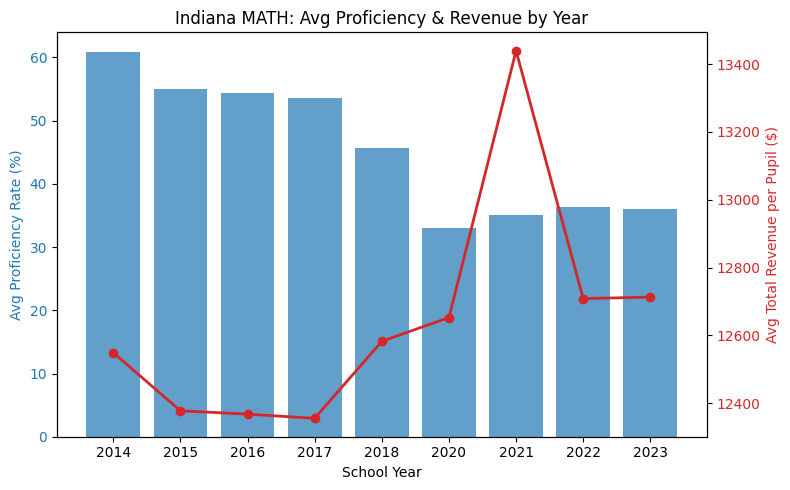



=== ELA MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     51.23
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:42:32   Log-Likelihood:                -88767.
No. Observations:               22136   AIC:                         1.785e+05
Df Residuals:                   21636   BIC:                         1.825e+05
Df Model:                         499                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

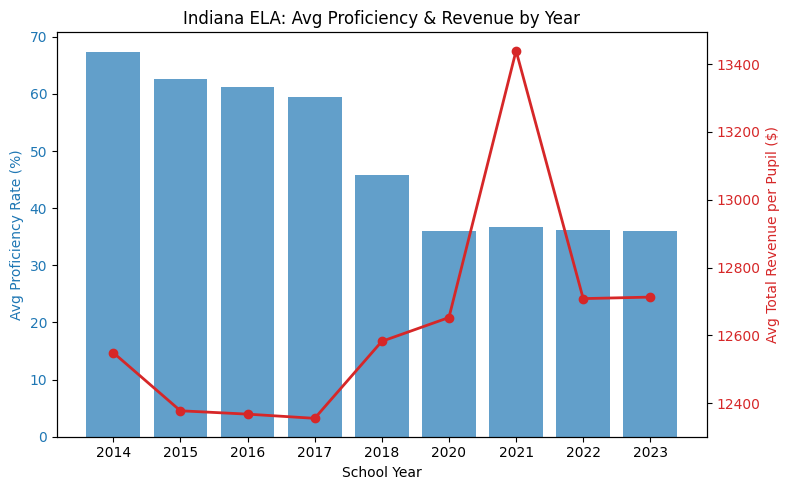

In [ ]:
path = "preprocessed_dataset.csv"
filtered = []

with open(path, newline="") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    idx_state = header.index("State")
    idx_subj = header.index("Subject")
    idx_rev = header.index("Total Revenue (TOTALREV) per Pupil (V33)")
    idx_prof = header.index("ProficientOrAbove_percent")
    idx_year = header.index("SchYear_clean")

    idx_part = header.index("ParticipationRate")
    idx_disloc = header.index("DistLocale")
    idx_district = header.index("DistrictName_clean")
    idx_ptratio = header.index("Pupil/Teacher Ratio")
    idx_grade = header.index("Grade_numeric")

    for row in reader:
        subj = row[idx_subj].strip().lower()
        if row[idx_state] == "Indiana" and subj in ("math", "ela"):
            try:
                prof = float(row[idx_prof])
                rev = float(row[idx_rev])
                part = float(row[idx_part])
                ptratio = float(row[idx_ptratio])
                grade = int(float(row[idx_grade]))
            except ValueError:
                continue

            filtered.append(
                {
                    "Subject": subj,
                    "Proficient": prof,
                    "TotalRevenue": rev,
                    "SchYear_clean": row[idx_year],
                    "ParticipationRate": part,
                    "DistLocale": row[idx_disloc],
                    "DistrictName_clean": row[idx_district],
                    "Pupil/Teacher Ratio": ptratio,
                    "Grade_numeric": grade,
                }
            )


df = pd.DataFrame(filtered)
df["SchYear_clean"] = df["SchYear_clean"].astype("category")
df["DistLocale"] = df["DistLocale"].astype("category")
df["DistrictName_clean"] = df["DistrictName_clean"].astype("category")


for subj in ("math", "ela"):
    df_sub = df[df["Subject"] == subj]

    print(f"\n\n=== {subj.upper()} MODEL ===")
    model = smf.ols(
        "Proficient ~ TotalRevenue + ParticipationRate + Grade_numeric "
        "+ C(DistLocale) + C(DistrictName_clean)",
        data=df_sub,
    ).fit()
    print(model.summary())

    yearly = (
        df_sub.groupby("SchYear_clean", sort=True)
        .agg(AvgProficient=("Proficient", "mean"), AvgRevenue=("TotalRevenue", "mean"))
        .reset_index()
    )

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(yearly["SchYear_clean"].astype(str), yearly["AvgProficient"], alpha=0.7)
    ax1.set_xlabel("School Year")
    ax1.set_ylabel("Avg Proficiency Rate (%)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    ax2.plot(
        yearly["SchYear_clean"].astype(str),
        yearly["AvgRevenue"],
        color="tab:red",
        marker="o",
        linewidth=2,
    )
    ax2.set_ylabel("Avg Total Revenue per Pupil ($)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    plt.title(f"Indiana {subj.upper()}: Avg Proficiency & Revenue by Year")
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()



=== MATH MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     85.82
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.05e-18
Time:                        02:42:33   Log-Likelihood:                -117.04
No. Observations:                  48   AIC:                             242.1
Df Residuals:                      44   BIC:                             249.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept        

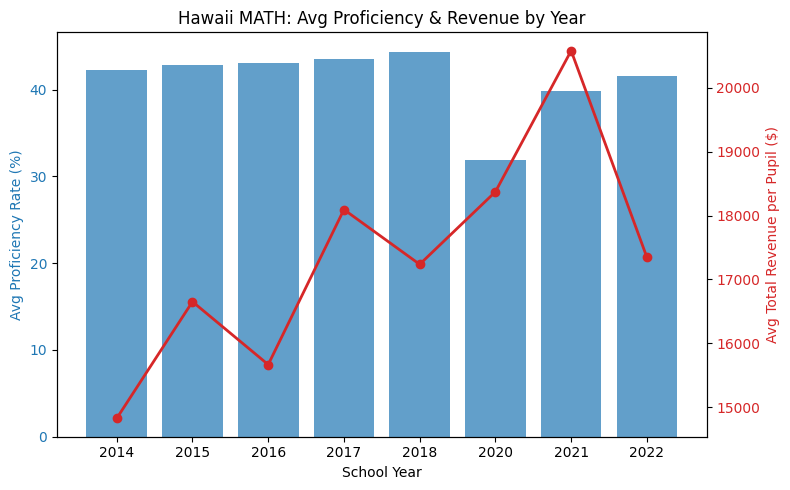



=== ELA MODEL ===
                            OLS Regression Results                            
Dep. Variable:             Proficient   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3.249
Date:                Tue, 22 Apr 2025   Prob (F-statistic):             0.0306
Time:                        02:42:33   Log-Likelihood:                -116.78
No. Observations:                  48   AIC:                             241.6
Df Residuals:                      44   BIC:                             249.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         

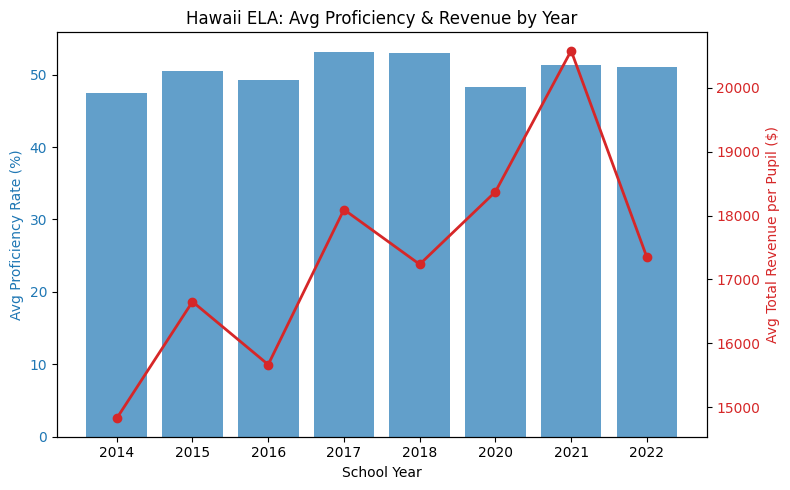

In [ ]:
path = "preprocessed_dataset.csv"
filtered = []

with open(path, newline="") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)

    idx_state = header.index("State")
    idx_subj = header.index("Subject")
    idx_rev = header.index("Total Revenue (TOTALREV) per Pupil (V33)")
    idx_prof = header.index("ProficientOrAbove_percent")
    idx_year = header.index("SchYear_clean")

    idx_part = header.index("ParticipationRate")
    idx_disloc = header.index("DistLocale")
    idx_district = header.index("DistrictName_clean")
    idx_ptratio = header.index("Pupil/Teacher Ratio")
    idx_grade = header.index("Grade_numeric")

    for row in reader:
        subj = row[idx_subj].strip().lower()
        if row[idx_state] == "Hawaii" and subj in ("math", "ela"):
            try:
                prof = float(row[idx_prof])
                rev = float(row[idx_rev])
                part = float(row[idx_part])
                ptratio = float(row[idx_ptratio])
                grade = int(float(row[idx_grade]))
            except ValueError:
                continue

            filtered.append(
                {
                    "Subject": subj,
                    "Proficient": prof,
                    "TotalRevenue": rev,
                    "SchYear_clean": row[idx_year],
                    "ParticipationRate": part,
                    "DistLocale": row[idx_disloc],
                    "DistrictName_clean": row[idx_district],
                    "Pupil/Teacher Ratio": ptratio,
                    "Grade_numeric": grade,
                }
            )


df = pd.DataFrame(filtered)
df["SchYear_clean"] = df["SchYear_clean"].astype("category")
df["DistLocale"] = df["DistLocale"].astype("category")
df["DistrictName_clean"] = df["DistrictName_clean"].astype("category")


for subj in ("math", "ela"):
    df_sub = df[df["Subject"] == subj]

    print(f"\n\n=== {subj.upper()} MODEL ===")
    model = smf.ols(
        "Proficient ~ TotalRevenue + ParticipationRate + Grade_numeric "
        "+ C(DistLocale) + C(DistrictName_clean)",
        data=df_sub,
    ).fit()
    print(model.summary())

    yearly = (
        df_sub.groupby("SchYear_clean", sort=True)
        .agg(AvgProficient=("Proficient", "mean"), AvgRevenue=("TotalRevenue", "mean"))
        .reset_index()
    )

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(yearly["SchYear_clean"].astype(str), yearly["AvgProficient"], alpha=0.7)
    ax1.set_xlabel("School Year")
    ax1.set_ylabel("Avg Proficiency Rate (%)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    ax2.plot(
        yearly["SchYear_clean"].astype(str),
        yearly["AvgRevenue"],
        color="tab:red",
        marker="o",
        linewidth=2,
    )
    ax2.set_ylabel("Avg Total Revenue per Pupil ($)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    plt.title(f"Hawaii {subj.upper()}: Avg Proficiency & Revenue by Year")
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()